In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


<h3> Loading Data</h3>

In [101]:
survey_raw_df = pd.read_csv("./stack_overflow_developer_survey_2022/survey_results_public.csv")

In [102]:
schema_raw_df = pd.read_csv("./stack_overflow_developer_survey_2022/survey_results_schema.csv")

In [103]:
survey_raw_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [104]:
columnNames = survey_raw_df.columns

In [105]:
schema_raw_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


The `survey` dataset contains responses to questions given in the `schema` dataset. It has around 79 questions (some of them are unnecessory columns).<br>
<br>
Let's get all the questions 

In [106]:
# newvalues = schema_raw_df.drop(schema_raw_df[schema_raw_df['qname'].isin(['MetaInfo', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])].index)
schema_raw_df.drop(schema_raw_df[schema_raw_df['qname'].isin(['MetaInfo', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])].index, inplace=True)

In [107]:
schema_raw_df = schema_raw_df.set_index('qname')['question'].squeeze()

In [108]:
schema_raw_df["LearnCodeOnline"]

'What online resources do you use to learn to code? Select all that apply.'

schema_raw_df contains questions for the columns in survey_raw_df.

<h2>Data Preparation and Cleaning</h2><br>
    The stackoverflow survey dataset contains a wealth of information, but Let's divide our analysis into the following sections:<br>
    <ul><li><h3>Developer Profile</h3></li>
    <li><h3>Data Scientist and Analyst</h3></li>
    <li><h3>Work and Employment</h3></li>
    

In [109]:
survey_raw_df['PlatformHaveWorkedWith']

0                                           NaN
1                                           NaN
2                                           NaN
3                                           NaN
4                      Firebase;Microsoft Azure
                          ...                  
73263             AWS;DigitalOcean;Google Cloud
73264                                       NaN
73265    Managed Hosting;Microsoft Azure;VMware
73266                                       NaN
73267                           Microsoft Azure
Name: PlatformHaveWorkedWith, Length: 73268, dtype: object

In [110]:
selected_columns_questions = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    # Education 
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    # Programming experience
    'YearsCode',
    'YearsCodePro',
    'Language',
    'Database',
    'Platform',
    # Employment
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'DevType',
    'WorkExp',
    'CompTotal',
    'CompFreq',
    'Currency',
    # Other
    'TimeSearching',
    'TimeAnswering'
]

## Language = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
## Database = ['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']
## Platform = ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith']


In [111]:
len(selected_columns_questions)

23

In [112]:
questionsData = schema_raw_df[selected_columns_questions]

In [113]:
questionsData

qname
Country                 Where do you live? <span style="font-weight: b...
Age                                                     What is your age?
Gender                  Which of the following describe you, if any? P...
Ethnicity               Which of the following describe you, if any? P...
EdLevel                 Which of the following best describes the high...
LearnCode               How did you learn to code? Select all that apply.
LearnCodeOnline         What online resources do you use to learn to c...
LearnCodeCoursesCert    What online courses or certifications do you u...
YearsCode               Including any education, how many years have y...
YearsCodePro            NOT including education, how many years have y...
Language                Which <b>programming, scripting, and markup la...
Database                Which <b>database environments </b>have you do...
Platform                Which <b>cloud platforms</b> have you done ext...
Employment              Which of

In [114]:
# Cleaning html tags 
questionsData = questionsData.str.replace(r'<[^<>]*>', '', regex=True)

Following columns are in combined form in schema_raw_df<br>
Language = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'] <br>
Database = ['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith'] <br>
Platform = ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith'] <br>


In [115]:
selected_columns_survey = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    # Education 
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    # Programming experience
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith',
    # Employment
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'DevType',
    'WorkExp',
    'CompTotal',
    'CompFreq',
    'Currency',
    # Other
    'TimeSearching',
    'TimeAnswering'
]


Let's extract a copy of the data from these selected columns into a new data frame `survey_df`, which we can continue to modify further without affecting the orginal data frame. 

In [116]:
survey_df = survey_raw_df[selected_columns_survey].copy()

In [117]:
survey_df.shape

(73268, 26)

In [118]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   Ethnicity               69474 non-null  object 
 4   EdLevel                 71571 non-null  object 
 5   LearnCode               71580 non-null  object 
 6   LearnCodeOnline         50685 non-null  object 
 7   LearnCodeCoursesCert    29389 non-null  object 
 8   YearsCode               71331 non-null  object 
 9   YearsCodePro            51833 non-null  object 
 10  LanguageHaveWorkedWith  70975 non-null  object 
 11  DatabaseHaveWorkedWith  60121 non-null  object 
 12  PlatformHaveWorkedWith  49924 non-null  object 
 13  LanguageWantToWorkWith  67027 non-null  object 
 14  DatabaseWantToWorkWith  51014 non-null

#### Data Cleaning

converting YearsCode and YearsCodePro to numeric data types.

In [119]:
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')


In [120]:
## replacing multiple selected values from Gender column by np.nan
survey_df.where(survey_df['Gender'].isin(['Man', 'Woman', 'Prefer not to say']), np.nan, inplace=True)

Let's take a look at all the columns one by one.

In [121]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29402
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15048
Some college/university study without earning a degree                                 8909
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7526
Associate degree (A.A., A.S., etc.)                                                    2176
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2082
Primary/elementary school                                                              1683
Something else                                                                         1138
Professional degree (JD, MD, etc.)                                                     1085
Name: EdLevel, dtype: int64

In [122]:
survey_df.LanguageHaveWorkedWith.isnull().sum()

4788

### Exploratory Data Analysis and Visualization

In [123]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


## 1. Developer Profile
Let's look at the information on the demographics, age, education level, and programming community of developers. 

### Demographics
#### Country
Let's look at the number of countries from which there are responses in the survey, and plot the 10 countries with the highest number of responses.

In [124]:
questionsData['Country']

'Where do you live? *'

In [125]:
survey_df['Country'].nunique()

180

The survey received responses from individuals residing in 180 different countries. However, we will plot 20 countries with the highest number of respondents 

In [126]:
top_countries = survey_df.Country.value_counts().head(20)

In [127]:
top_countries.rename(index={'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'}, inplace=True)

Lets' plot a bar chart 

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Where do you live? *'}>

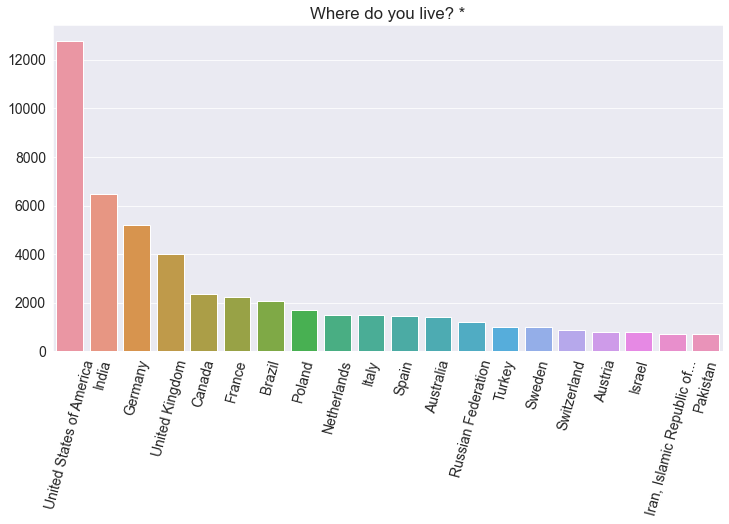

In [128]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(questionsData['Country'])
sns.barplot(top_countries.index, top_countries.values)

It appears that the majority of the responses are from English-speaking countries, with the USA having the highest number of responses. This may suggest that the survey is not a fully representative global sample of all countries.

#### Age
Lets look the age of all respndents vs professional developers

In [129]:
age_percents = (survey_df.Age.value_counts()/survey_df.Age.value_counts().sum())*100

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


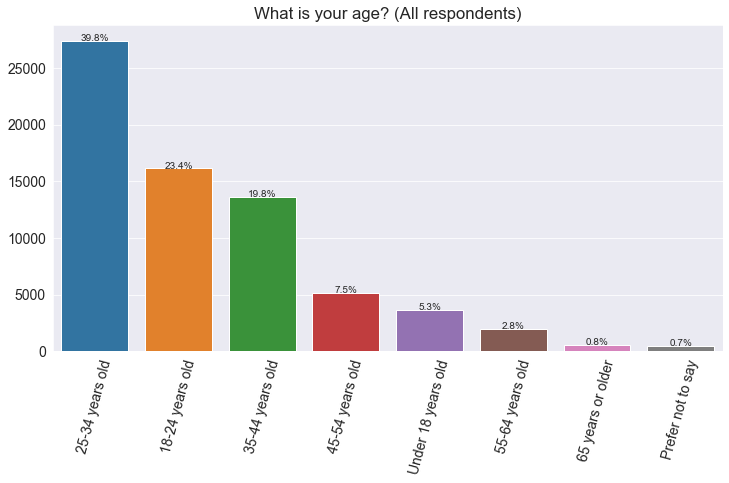

In [130]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(questionsData['Age'] + " (All respondents)")
ax = sns.barplot(survey_df.Age.value_counts().index, survey_df.Age.value_counts().values)

for i, v in enumerate(survey_df.Age.value_counts().values):
    ax.text(i, v, f"{age_percents[i]:.1f}%", ha='center', fontsize=10)

plt.show()

Approximately 82% of the respondents fall within the age range of 18 to 44 years old.

In [131]:
def split_column_to_matrix(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


In [132]:
employment_df = split_column_to_matrix(survey_df.Employment)

In [133]:
prof_developers = survey_df[employment_df['Employed, full-time'] | employment_df['Independent contractor, freelancer, or self-employed'] | employment_df['Employed, part-time'] | employment_df['Retired']]

In [134]:
learningToCode_developers = survey_df[~(employment_df['Employed, full-time'] | employment_df['Independent contractor, freelancer, or self-employed'] | employment_df['Employed, part-time'])]

###### Professional Developers

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


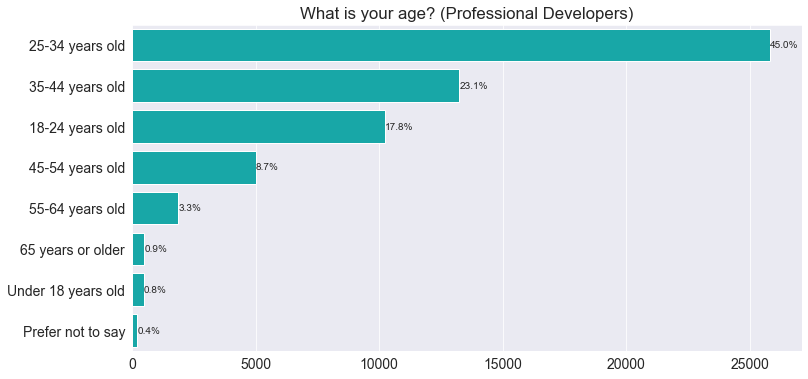

In [135]:
age_percents = (prof_developers.Age.value_counts()/prof_developers.Age.value_counts().sum())*100
plt.figure(figsize=(12, 6))
plt.title(questionsData['Age'] + " (Professional Developers)")
ax = sns.barplot(prof_developers.Age.value_counts().values, prof_developers.Age.value_counts().index, color='c', orient='h', order=None)

for i, v in enumerate(prof_developers.Age.value_counts().values):
    ax.text(v, i, f"{age_percents[i]:.1f}%", va='center', fontsize=10)

plt.show()

45% Professional Developers are between the age of 25-34. Which is nearly the half of all the respondents. 

###### Learning to Code

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


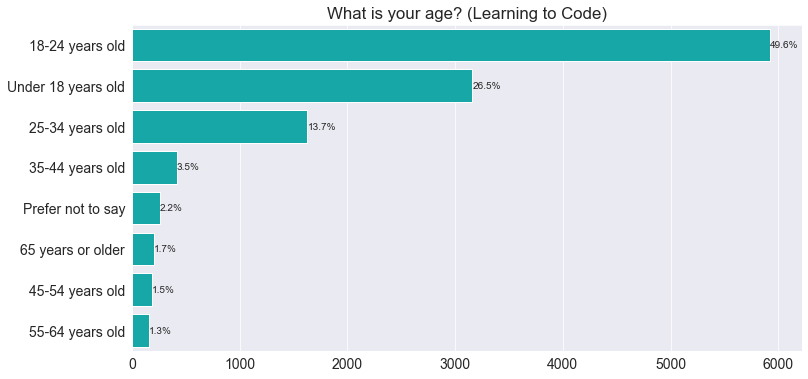

In [136]:
age_percents = (learningToCode_developers.Age.value_counts()/learningToCode_developers.Age.value_counts().sum())*100
plt.figure(figsize=(12, 6))
plt.title(questionsData['Age'] + " (Learning to Code)")
ax = sns.barplot(learningToCode_developers.Age.value_counts().values, learningToCode_developers.Age.value_counts().index, color='c', orient='h', order=None)

for i, v in enumerate(learningToCode_developers.Age.value_counts().values):
    ax.text(v, i, f"{age_percents[i]:.1f}%", va='center', fontsize=10)

plt.show()

Over 75% of respondents who are learning to code are under the age of 25 years old.

#### Gender 

In [137]:
questionsData['Gender']

'Which of the following describe you, if any? Please check all that apply.'

In [138]:
gender_counts = survey_df['Gender'].value_counts(dropna=True)

([<matplotlib.patches.Wedge at 0x27e0309d190>,
 [Text(-1.0763849531317158, 0.2267056079404169, 'Man'),
  Text(1.0628001707905759, -0.28364731087659356, 'Woman'),
  Text(1.0984423160918713, -0.05851904150552755, 'Prefer not to say')],
 [Text(-0.5871190653445723, 0.12365760433113646, '93.39%'),
  Text(0.5797091840675868, -0.1547167150235965, '4.91%'),
  Text(0.5991503542319297, -0.031919477184833206, '1.69%')])

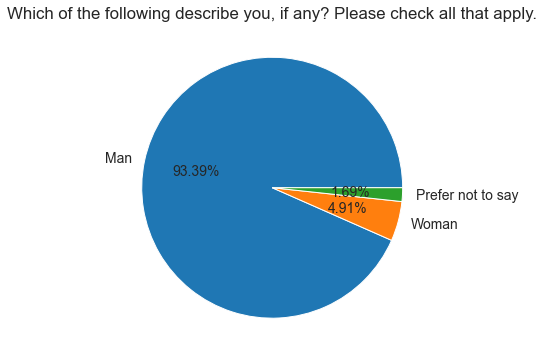

In [139]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['Gender'])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%')

The programming community is predominantly male, with 90% of the respondents identifying themselves as men. This highlights the significant underrepresentation of female and non-binary genders in this field.

In [140]:
learningToCode_developers.Gender.value_counts()

Man                  11003
Woman                  645
Prefer not to say      390
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x27e030ea400>,
 [Text(-1.0601165813025155, 0.29351803019144684, 'Man'),
  Text(1.0248078645438046, -0.3997109465215673, 'Woman'),
  Text(1.094307437236268, -0.11176418392933998, 'Prefer not to say')],
 [Text(-0.5782454079831902, 0.16010074374078917, '91.40%'),
  Text(0.5589861079329843, -0.2180241526481276, '5.36%'),
  Text(0.596894965765237, -0.06096228214327635, '3.24%')])

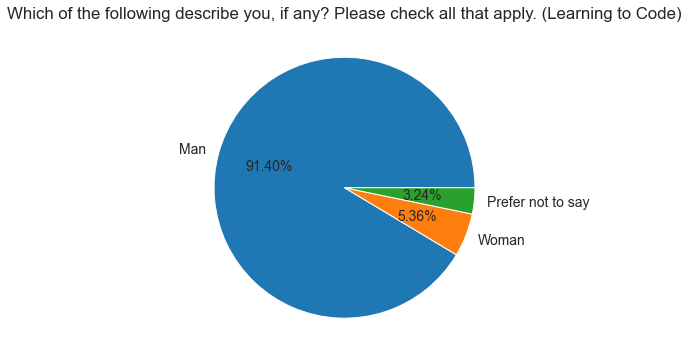

In [141]:
# Gender diversity in Learning to Code
gender_counts = learningToCode_developers['Gender'].value_counts(dropna=True)
plt.figure(figsize=(12, 6))
plt.title(questionsData['Gender'] + ' (Learning to Code)')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%')

Again majority of individuals who are learning to code identify themselves as male. 

In [142]:
genderCountsByCountry = survey_df.groupby('Country').Gender.value_counts()
genderTotals = genderCountsByCountry.groupby(level=0).sum()
genderPercentageByCountry = genderCountsByCountry/genderTotals * 100

In [143]:
# indices of top countries with highest respondents
genderTotals.nlargest(15).index

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Italy', 'Spain',
       'Australia', 'Russian Federation', 'Turkey', 'Sweden'],
      dtype='object', name='Country')

In [144]:
# Top 15 countries with highest respondents and their gender diversity
topCountriesWithGenderPercents = genderPercentageByCountry.unstack().dropna().loc[genderTotals.nlargest(15).index]

In [145]:
topCountriesWithGenderPercents['Woman'].sort_values(ascending=False)

Country
United States of America                                6.348214
Canada                                                  5.469079
India                                                   5.369024
Netherlands                                             5.294507
Brazil                                                  5.155642
Australia                                               5.085960
United Kingdom of Great Britain and Northern Ireland    5.069930
Spain                                                   5.037440
Russian Federation                                      4.037006
Turkey                                                  3.915663
Sweden                                                  3.842265
France                                                  3.808244
Germany                                                 3.589251
Italy                                                   3.455285
Poland                                                  3.250591
Name: Woman, dtyp

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


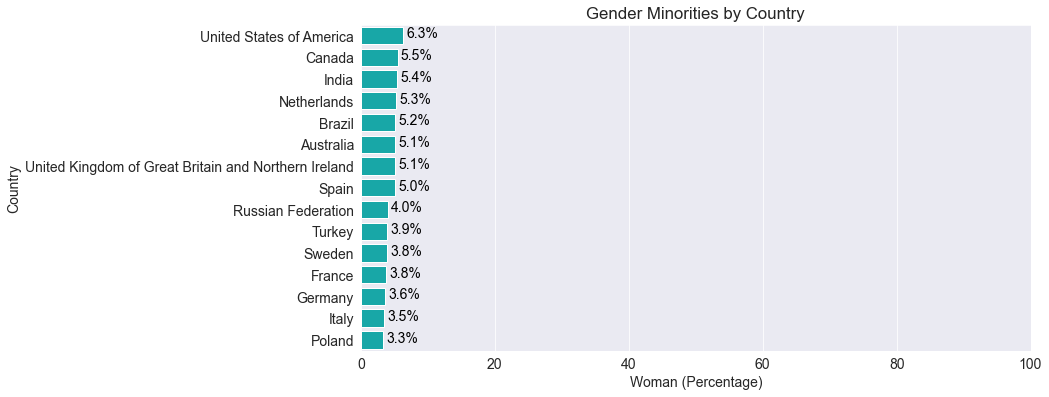

In [146]:
plt.figure(figsize=(12, 6))
plt.title("Gender Minorities by Country")
ax = sns.barplot(topCountriesWithGenderPercents['Woman'].sort_values(ascending=False), topCountriesWithGenderPercents['Woman'].sort_values(ascending=False).index, orient='h', color='c')
ax.set_xlim(0, 100)
plt.xlabel('Woman (Percentage)')

for i, v in enumerate(topCountriesWithGenderPercents['Woman'].sort_values(ascending=False)):
    ax.text(v + 0.5, i + 0.1, f'{v:.1f}%', color='black')

plt.show()

The graph above depicts the percentage of women respondents from different countries.

#### Ethnicity


In [147]:
# Let's split the Ethnicity column into a matrix
race_df = split_column_to_matrix(survey_df.Ethnicity)

In [148]:
race_total_series  = pd.Series(dtype=int)
for i in race_df.columns:
    race_total_series[i] = race_df[i].sum()

In [149]:
race_total_series.sort_values(ascending=False)

White                                                            26512
European                                                         25240
Indian                                                            6618
Asian                                                             6402
Hispanic or Latino/a                                              3845
Middle Eastern                                                    2775
South American                                                    2552
African                                                           2226
North American                                                    2201
South Asian                                                       1744
Prefer not to say                                                 1673
Southeast Asian                                                   1542
Or, in your own words:                                            1331
East Asian                                                        1138
Multir

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


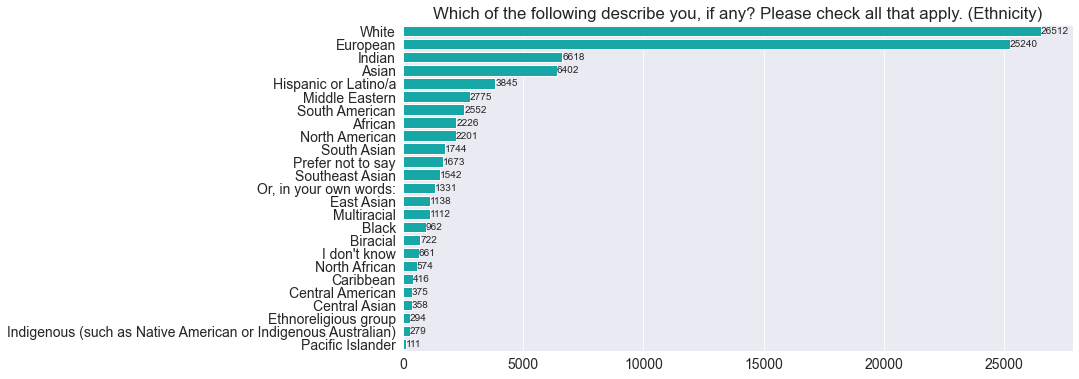

In [150]:
# Drawing a barplot
plt.figure(figsize=(12, 6))
plt.title(questionsData['Ethnicity'] + " (Ethnicity)")
ax = sns.barplot(race_total_series.sort_values(ascending=False), race_total_series.sort_values(ascending=False).index, orient='h', color='c')
for i, v in enumerate(race_total_series.sort_values(ascending=False)):
    ax.text(v, i, f"{v}", va='center', fontsize=10)

plt.show()

The survey respondents come from a diverse range of ethnic backgrounds, with the majority identifying as white or European. Indian and Asian respondents also make up a significant proportion of the sample.

#### Education Level

In [151]:
questionsData['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [152]:
survey_df['EdLevel'].dropna().head()
# survey_df['EdLevel'].value_counts() 

2      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
6    Secondary school (e.g. American high school, G...
7    Some college/university study without earning ...
8      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
Name: EdLevel, dtype: object

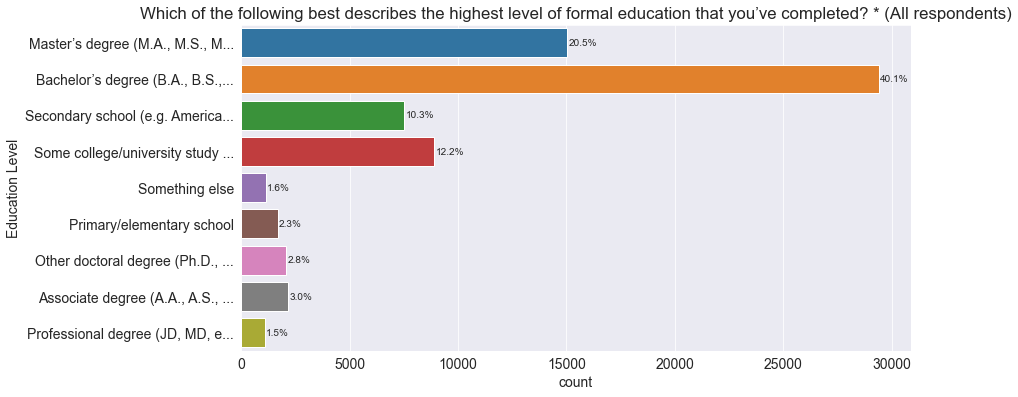

In [153]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['EdLevel'] + " (All respondents)")
ax = sns.countplot(y=survey_df.EdLevel)

def design_graph(given_df):
    # Fixing y axis labels
    labels = [label.get_text()[:30] + '...' if len(label.get_text()) > 30 else label.get_text() for label in plt.gca().get_yticklabels()]
    plt.gca().set_yticklabels(labels)

    # To show percentage 
    total = len(given_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 50
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, percentage, ha='left', va='center', fontsize=10)
    # Set the y-axis label
    plt.ylabel('Education Level')

design_graph(survey_df)

Education is a significant factor for both individuals who are learning to code and professional developers. Let's explore the importance of education in these groups.

**Learning To Code**

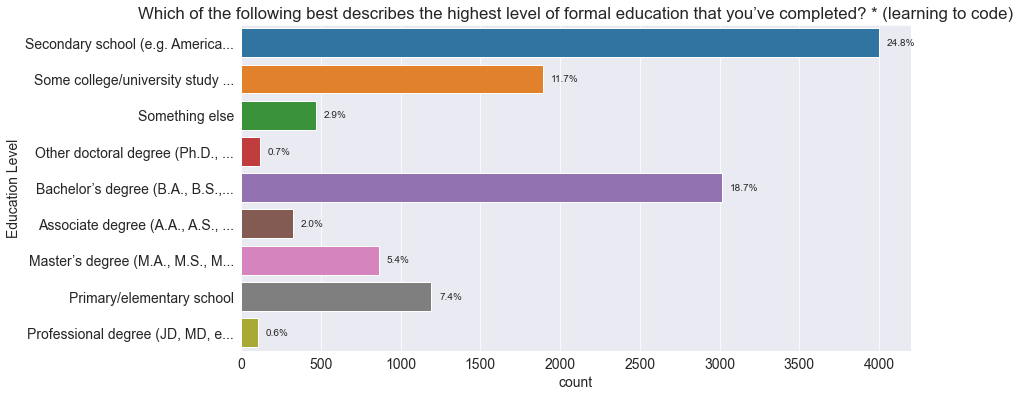

In [154]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['EdLevel'] + " (learning to code)")
ax = sns.countplot(y=learningToCode_developers.EdLevel)

design_graph(learningToCode_developers)

**Professional Developers**

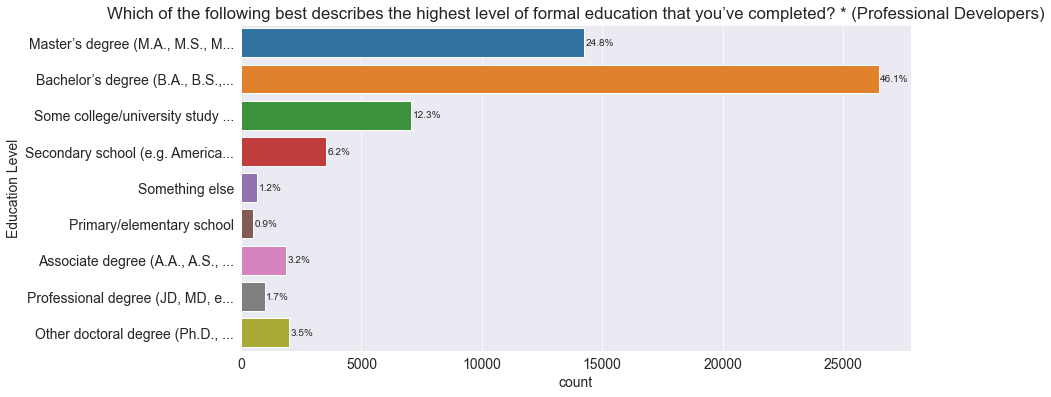

In [155]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['EdLevel'] + " (Professional Developers)")
ax = sns.countplot(y=prof_developers.EdLevel)

design_graph(prof_developers)

Around 50% of those learning to code already have a Secondary School( High School Education) or a Bachelore's degree. <br>
While 80% of Professional developers have completed some form of higher education, a bachelor's degree being the most common.


#### Learning to code
The methods of learning to code are diverse, ranging from online resources to offline programs. Let's explore the various ways people are acquiring coding skills in today's digital age.

Exploring the following three columns.<br>
-LearnCode<br>
-LearnCodeOnline<br>

In [156]:
survey_df.LearnCode
learnCodeDF = split_column_to_matrix(survey_df.LearnCode)

In [157]:
learnCode_Series = pd.Series(dtype=int)
for i in learnCodeDF.columns:
    learnCode_Series[i] = learnCodeDF[i].sum()

In [158]:
learnCode_Series.sort_values(ascending=False)

Other online resources (e.g., videos, blogs, forum)    48968
School (i.e., University, College, etc)                43058
Books / Physical media                                 37654
Online Courses or Certification                        32451
On the job training                                    27656
Colleague                                              12779
Friend or family member                                 9540
Coding Bootcamp                                         7460
Hackathons (virtual or in-person)                       5043
Other (please specify):                                 3306
dtype: int64

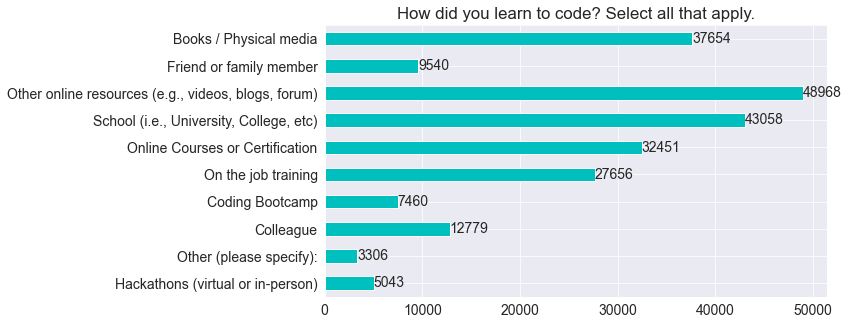

In [159]:
learnCode_Series[-1::-1].plot(kind='barh', color='c')
plt.title(questionsData.LearnCode)

for i, v in enumerate(learnCode_Series[-1::-1]):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

According to the graph above, which represents various methods of learning to code, the most popular ways to learn are through online resources and traditional schools.

In [160]:
survey_df.LearnCodeOnline
learnCodeOnlineDF = split_column_to_matrix(survey_df.LearnCodeOnline)


In [161]:
learnCodeOnline_series = pd.Series(dtype=int)
for i in learnCodeOnlineDF.columns:
    learnCodeOnline_series[i] = learnCodeOnlineDF[i].sum()

In [162]:
learnCodeOnline_series.sort_values()

Other (Please specify):                                          933
Auditory material (e.g., podcasts)                              3525
Programming Games                                               6414
Certification videos                                            7363
Online challenges (e.g., daily or weekly coding challenges)    12244
Interactive tutorial                                           12767
Coding sessions (live or recorded)                             14179
Written-based Online Courses                                   16782
Online forum                                                   19675
Online books                                                   21457
Video-based Online Courses                                     25375
Written Tutorials                                              28344
How-to videos                                                  29474
Blogs                                                          36880
Stack Overflow                    

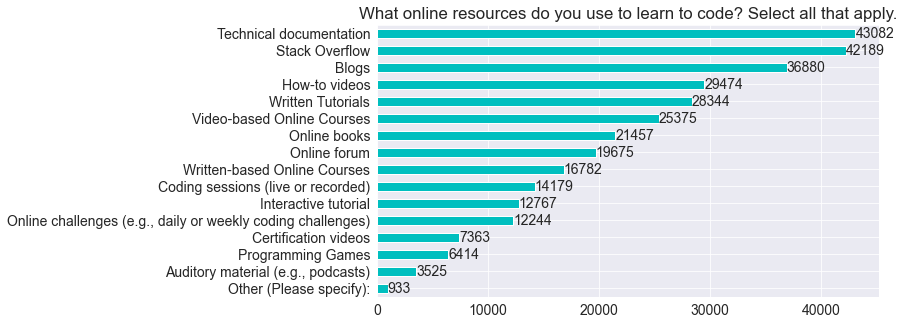

In [163]:
learnCodeOnline_series.sort_values().plot(kind='barh', color='c')
plt.title(questionsData.LearnCodeOnline)

for i, v in enumerate(learnCodeOnline_series.sort_values()):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

Online learning has become the preferred option for both learners and seasoned professionals looking to improve their coding skills. The vast amount of resources available on the internet, including written documentation, books, tutorials, instructional videos, and online courses, makes it easier than ever to learn to code. With such a diverse range of options, learners can choose the best method to suit their learning style and pace.

### Employment 

In [164]:
questionsData.Employment

'Which of the following best describes your current employment status?'

We have around 4k NaN values.
Taking a look at top 12

In [165]:
employment_counts = survey_df.Employment.value_counts(normalize=True).head(12)

In [166]:
employment_counts = employment_counts*100

Text(0.5, 0, 'Percentage')

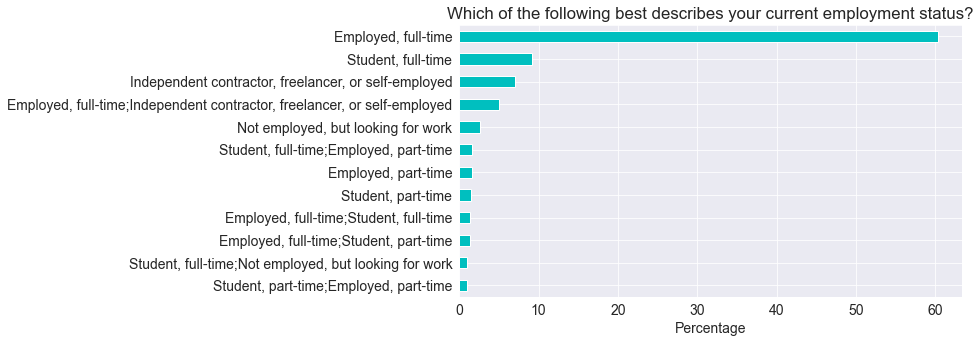

In [167]:
employment_counts[-1::-1].plot(kind='barh', color='c')
plt.title(questionsData.Employment)
plt.xlabel('Percentage')

Based on the survey results, it appears that the majority of the respondents are employed. This suggests that the sample of programmers who participated in the survey is more likely to consist of individuals who have a job or are self-employed.

## 2. Data Scientist and Analyst
<ul>
    <li>Technologies</li>
    <li>Salary</li>
    <li>Gender ratio</li>
</ul>

In [168]:
survey_df.DevType
developerTypes = split_column_to_matrix(survey_df.DevType).columns

In [169]:
developerTypes

Index(['Data scientist or machine learning specialist', 'Developer, front-end',
       'Engineer, data', 'Engineer, site reliability', 'Developer, full-stack',
       'Student', 'Developer, back-end',
       'Developer, desktop or enterprise applications', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist', 'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Developer, QA or test', 'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'],
      dtype='object')

In [170]:
# separating all the columns that has data related jobs
data_roles = []
for i in developerTypes:
    if 'data' in i.lower():
        data_roles.append(i)

data_roles

['Data scientist or machine learning specialist',
 'Engineer, data',
 'Database administrator',
 'Data or business analyst']

In [171]:
# using fillna() to method to replace 'NaN' values in DevType column because masking on 'NaN', True, False is not possible.
survey_df['DevType'] = survey_df['DevType'].fillna('')
survey_df['DevType']

0                                                         
1                                                         
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4                                                         
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [172]:
substr_pattern = '|'.join(data_roles) ## str.contains() method in pandas expects a regular expression pattern as input. | is 'or' regx
filtered_dataJobs_df = survey_df[survey_df.DevType.str.contains(substr_pattern)]


In [173]:
filtered_dataJobs_df

,Country,Age,Gender,Ethnicity,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Employment,RemoteWork,CodingActivities,DevType,WorkExp,CompTotal,CompFreq,Currency,TimeSearching,TimeAnswering
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,White,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14.0,5.0,...,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Data scientist or machine learning specialist;...,NaN,32000.0,Yearly,GBP\tPound sterling,NaN,NaN
13,Australia,35-44 years old,Woman,White,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,22.0,15.0,...,"Employed, part-time",Fully remote,Hobby,"Developer, front-end;Developer, full-stack;Dev...",15.0,NaN,NaN,AUD\tAustralian dollar,60-120 minutes a day,30-60 minutes a day
17,Austria,25-34 years old,Woman,European,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,Coursera;Pluralsight,13.0,10.0,...,"Employed, full-time",Fully remote,Hobby,"Engineer, data",NaN,190000.0,Yearly,EUR European Euro,NaN,NaN
39,Czech Republic,35-44 years old,Man,European,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy;Codecademy,24.0,18.0,...,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Developer, back-end;Database administrator;Dev...",NaN,NaN,Monthly,CZK\tCzech koruna,NaN,NaN
40,United States of America,35-44 years old,Man,White,"Associate degree (A.A., A.S., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,20.0,15.0,...,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Developer, front-end;Engineer, data;Developer,...",NaN,130000.0,Yearly,USD\tUnited States dollar,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73246,Russian Federation,35-44 years old,Man,White;European,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow;O...,Coursera;Udemy;Codecademy,10.0,5.0,...,"Employed, full-time",Fully remote,Hobby,"Developer, back-end;Developer, desktop or ente...",5.0,150000.0,Monthly,RUB\tRussian ruble,15-30 minutes a day,30-60 minutes a day
73254,United States of America,35-44 years old,Man,White,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Codecademy;edX,7.0,6.0,...,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Data scientist or machine learning specialist;...,16.0,115000.0,Yearly,USD\tUnited States dollar,60-120 minutes a day,30-60 minutes a day
73256,Romania,18-24 years old,Man,White;European,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,Coursera;Udemy,9.0,NaN,...,"Student, part-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Engineer, data",NaN,NaN,NaN,NaN,NaN,NaN
73264,United States of America,25-34 years old,Man,White,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6.0,5.0,...,"Employed, full-time",Full in-person,Hobby,Data scientist or machine learning specialist,6.0,107000.0,Yearly,USD\tUnited States dollar,15-30 minutes a day,60-120 minutes a day


In [174]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [175]:
filtered_dataJobs_df.WorkExp #.value_counts()
# Languages have worked with and technoglogies
    # LanguageHaveWorkedWith
    # LanguageWantToWorkWith
    # DatabaseHaveWorkedWith
    # DatabaseWantToWorkWith
    # PlatformHaveWorkedWith
    # PlatformWantToWorkWith
# EdLevel
# WorkExp
# Gender
# Salary

# survey_raw_df.CompTotal

2         NaN
13       15.0
17        NaN
39        NaN
40        NaN
         ... 
73246     5.0
73254    16.0
73256     NaN
73264     6.0
73267     NaN
Name: WorkExp, Length: 10709, dtype: float64

In [176]:
# for i in split_column_to_matrix(filtered_dataJobs_df.LanguageHaveWorkedWith).columns:
#     print(i, split_column_to_matrix(filtered_dataJobs_df.LanguageHaveWorkedWith)[i].sum())


# filtered_dataJobs_df.DevType.value_counts().head(20)
# filtered_dataJobs_df[filtered_dataJobs_df.DevType.isin(["Engineer, data;Developer, full-stack","Data scientist or machine learning specialist;Developer, back-end", 'Data scientist or machine learning specialist', 'Engineer, data', 'Data or business analyst', 'Engineer, data;Developer, back-end', "Data scientist or machine learning specialist;Data or business analyst"])].LanguageHaveWorkedWith.value_counts().head(20)

In [177]:
filtered_dataJobs_df.LanguageHaveWorkedWith.value_counts() # splitting this into a df will give us more insight
data_lang_df = split_column_to_matrix(filtered_dataJobs_df.LanguageHaveWorkedWith)

We have 10k responses and 42 different languages. We will take a look at top 15 languages among data related jobs.

In [178]:
dataJobs_lang_series = pd.Series(dtype=int)
for i in data_lang_df.columns:
    dataJobs_lang_series[i] = data_lang_df[i].sum()

In [179]:
# data_lang_df.columns
dataJobs_lang_series.sort_values(ascending=False).head(15)

SQL           7363
Python        6735
JavaScript    6263
HTML/CSS      5486
Bash/Shell    3805
Java          3092
C#            2941
TypeScript    2878
PHP           2474
C++           2297
C             1917
PowerShell    1748
R             1363
Go            1192
VBA           1036
dtype: int64

<AxesSubplot:>

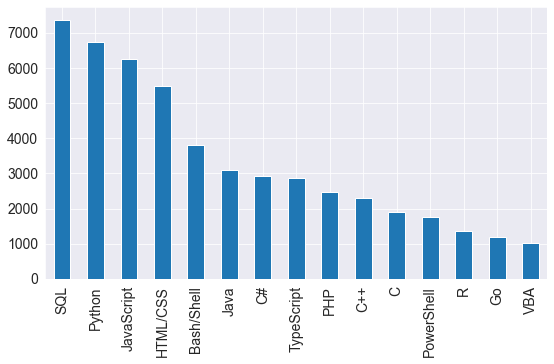

In [180]:
dataJobs_lang_series.sort_values(ascending=False).head(15).plot(kind='bar')

As we can see SQL and Python being the top most used languages in the data science and data analyst career, which is followed by JavaScript and Bash/Shell. 

In [181]:
filtered_dataJobs_df.DatabaseHaveWorkedWith.value_counts() # splitting this into a df will give us more insight
data_database_df = split_column_to_matrix(filtered_dataJobs_df.DatabaseHaveWorkedWith)

In [182]:
dataJobs_database_series = pd.Series(dtype=int)
for i in data_database_df.columns:
    dataJobs_database_series[i] = data_database_df[i].sum()

In [183]:
dataJobs_database_series.sort_values()

Couchbase                      136
CouchDB                        178
IBM DB2                        319
Neo4j                          346
Cassandra                      391
Cloud Firestore                577
Firebase Realtime Database     664
DynamoDB                       857
Elasticsearch                 1471
Oracle                        1540
MariaDB                       2164
Redis                         2273
MongoDB                       2551
SQLite                        3602
Microsoft SQL Server          3657
PostgreSQL                    4842
MySQL                         4866
dtype: int64

<AxesSubplot:>

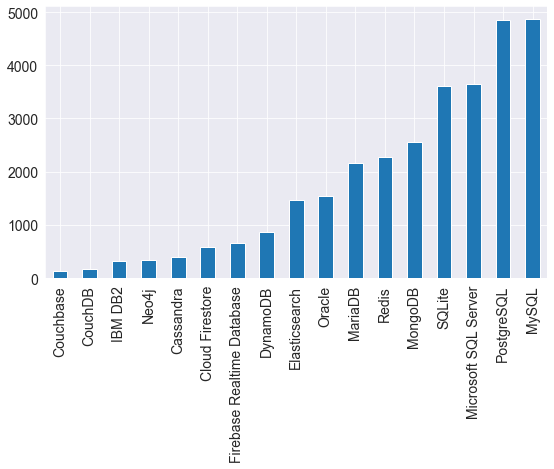

In [184]:
dataJobs_database_series.sort_values().plot(kind='bar')

As expected, RDBMS databases are the most popular choice for data storage due to SQL's universal acceptance as the standard language for database operations. However, alternative databases such as MongoDB and Redis are also have gained acceptance.

In [185]:
filtered_dataJobs_df.PlatformHaveWorkedWith.value_counts() # splitting this into a df will give us more insight
data_platform_df = split_column_to_matrix(filtered_dataJobs_df.PlatformHaveWorkedWith)

In [186]:
dataJobs_platform_series = pd.Series(dtype=int)
for i in data_platform_df.columns:
    dataJobs_platform_series[i] = data_platform_df[i].sum()

<AxesSubplot:>

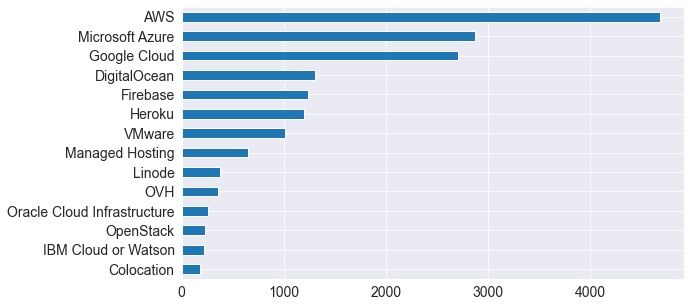

In [187]:
dataJobs_platform_series.sort_values().plot(kind='barh')

In [188]:
data_EdLevel_df = split_column_to_matrix(filtered_dataJobs_df.EdLevel)

In [189]:
dataJobs_EdLevel_series = pd.Series(dtype=int)
for i in data_EdLevel_df.columns:
    dataJobs_EdLevel_series[i] = data_EdLevel_df[i].sum()

In [190]:
dataJobs_EdLevel_series.sort_values(ascending=False)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4124
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       3166
Some college/university study without earning a degree                                1303
Other doctoral degree (Ph.D., Ed.D., etc.)                                             718
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     587
Associate degree (A.A., A.S., etc.)                                                    326
Professional degree (JD, MD, etc.)                                                     245
Something else                                                                         119
Primary/elementary school                                                              114
dtype: int64

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


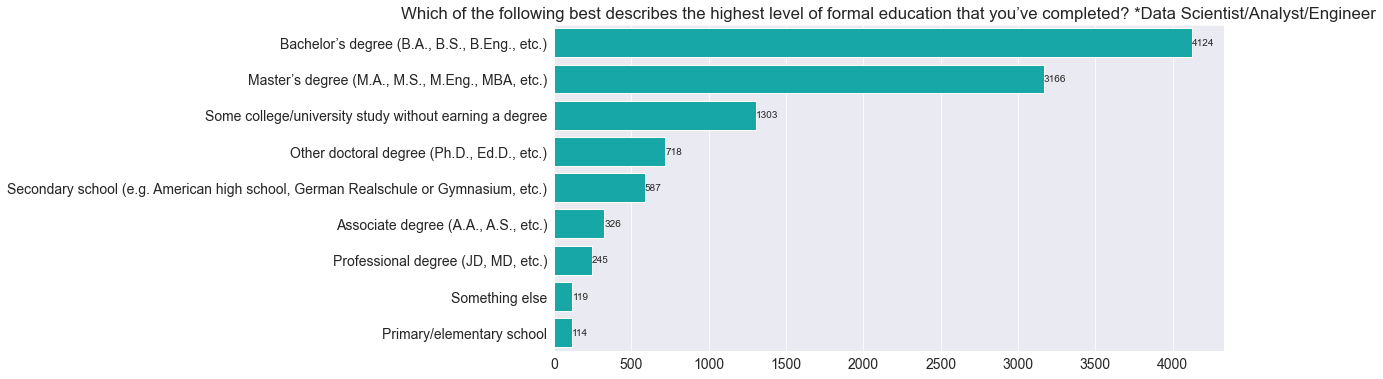

In [191]:
# Drawing a barplot
plt.figure(figsize=(12, 6))
plt.title(questionsData['EdLevel'] + "Data Scientist/Analyst/Engineer")
ax = sns.barplot(dataJobs_EdLevel_series.sort_values(ascending=False), dataJobs_EdLevel_series.sort_values(ascending=False).index, orient='h', color='c')
for i, v in enumerate(dataJobs_EdLevel_series.sort_values(ascending=False)):
    ax.text(v, i, f"{v}", va='center', fontsize=10)

plt.show()

The graph shows that the education level of data scientists and analysts is mostly concentrated at the Bachelor's and Master's degree levels, with Bachelor's being the most common degree held. PhD holders and Secondary school graduates make up a smaller proportion of data scientists/analysts. Overall, it seems having atleast Bachelor's degree is important for pursuing a career in data science or analysis.

In [192]:
filtered_dataJobs_df.WorkExp.dropna().shape

(6537,)

In [193]:
filtered_dataJobs_df.WorkExp.dropna()

13       15.0
41        3.0
50        4.0
60        4.0
79       10.0
         ... 
73229    15.0
73234    20.0
73246     5.0
73254    16.0
73264     6.0
Name: WorkExp, Length: 6537, dtype: float64

(array([ 31.,   0., 311.,   0., 370.,   0., 479.,   0., 419.,   0., 507.,
          0., 319.,   0., 321.,   0., 304.,   0., 171.,   0., 439.,   0.,
        185.,   0., 243.,   0., 125.,   0., 149.,   0., 302.,   0., 136.,
          0., 127.,   0., 120.,   0.,  55.,   0., 290.,   0.,  51.,   0.,
        130.,   0.,  89.,   0.,  63.,   0., 197.,   0.,  49.,   0.,  44.,
          0.,  25.,   0.,  19.,   0., 114.,   0.,  25.,   0.,  27.,   0.,
         28.,   0.,  26.,   0.,  56.,   0.,  21.,   0.,  17.,   0.,  15.,
          0.,   8.,   0.,  38.,   0.,   8.,   0.,  17.,   0.,   9.,   0.,
          7.,   0.,  11.,   0.,   9.,   0.,   3.,   0.,   5.,   0.,   0.,
         23.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

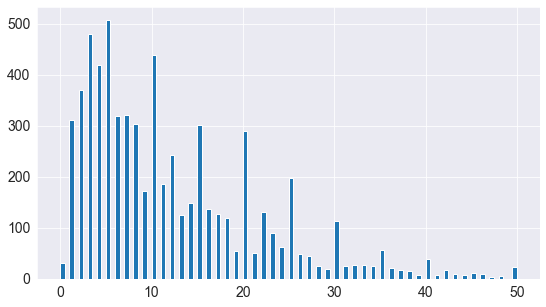

In [194]:
plt.hist(filtered_dataJobs_df.WorkExp.dropna(), bins=100) # change the size of bins = 50

The work experience of data scientists appears to be concentrated in the range of 0 to 10 years, with occasional spikes at the 20- and 30-year marks. As individuals get older and more experienced, they are more likely to retire or transition to a different role.

In [195]:
filtered_dataJobs_df.Employment.value_counts().head(15)

Employed, full-time                                                                             7120
Independent contractor, freelancer, or self-employed                                            1114
Employed, full-time;Independent contractor, freelancer, or self-employed                         816
Employed, full-time;Student, full-time                                                           190
Employed, part-time                                                                              182
Employed, full-time;Student, part-time                                                           181
Student, full-time;Employed, part-time                                                           175
Not employed, but looking for work                                                               171
Student, part-time;Employed, part-time                                                           119
Student, full-time;Independent contractor, freelancer, or self-employed                    

In [196]:
intern_substr = "|".join(["Employed, part-time", "looking for work"])
filtered_dataJobs_df[filtered_dataJobs_df.Employment.str.contains(intern_substr)].Employment.shape

(1097,)

The survey data may not be representative of the entire data science community globally, as certain groups such as students and part-time workers are less likely to participate in the survey.

In [197]:
filtered_dataJobs_df.Gender.value_counts()

Man                  10097
Woman                  436
Prefer not to say      176
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x27e0338bbb0>,
 [Text(-1.0823192393014462, 0.19643081285261482, 'Man'),
  Text(1.0707394315298138, -0.25202593074366647, 'Woman'),
  Text(1.0985341275850076, -0.056769450684734386, 'Prefer not to say')],
 [Text(-0.5903559487098796, 0.10714407973778989, '94.29%'),
  Text(0.5840396899253529, -0.1374686894965453, '4.07%'),
  Text(0.5992004332281858, -0.030965154918946025, '1.64%')])

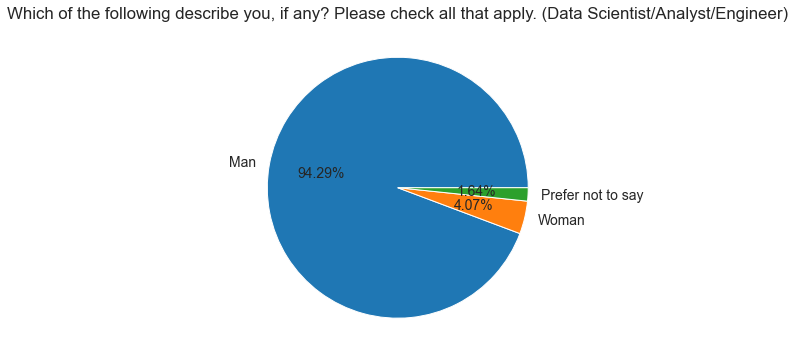

In [198]:

plt.figure(figsize=(12, 6))
plt.title(questionsData['Gender'] + ' (Data Scientist/Analyst/Engineer)')
plt.pie(filtered_dataJobs_df.Gender.value_counts(), labels=filtered_dataJobs_df.Gender.value_counts().index, autopct='%.2f%%')